In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
import psycopg2

In [4]:
# Importing the dataset
df = pd.read_csv("..\data\original_dataset.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
# Checking for NULL values
df_copy.isna().sum().sort_values(ascending = False)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df_copy.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [8]:
# Checking for any outliers
df_copy.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
# Transpose for better readability
desc_df = df_copy.describe().T
print(desc_df[['min', '25%', '50%', '75%', 'max']])

                                 min       25%       50%        75%        max
ID                               1.0   7500.75   15000.5   22500.25    30000.0
LIMIT_BAL                    10000.0  50000.00  140000.0  240000.00  1000000.0
SEX                              1.0      1.00       2.0       2.00        2.0
EDUCATION                        0.0      1.00       2.0       2.00        6.0
MARRIAGE                         0.0      1.00       2.0       2.00        3.0
AGE                             21.0     28.00      34.0      41.00       79.0
PAY_0                           -2.0     -1.00       0.0       0.00        8.0
PAY_2                           -2.0     -1.00       0.0       0.00        8.0
PAY_3                           -2.0     -1.00       0.0       0.00        8.0
PAY_4                           -2.0     -1.00       0.0       0.00        8.0
PAY_5                           -2.0     -1.00       0.0       0.00        8.0
PAY_6                           -2.0     -1.00      

Observations:
- Age: min age is 21 and max age is 79
- Limit_Balance: min balance is 10K and max balance is 1M
- Bill_Amount1: min bill is -165K and max is 964K
- pay_amount1: min is 0 and max is 873K

Checking for Outliers
- max age is 79: so checking are they reasonable credit card users
- credit limit balance is 1M would be unrealistic
- bill_amt columns have extreme negative values
- pay_amt have extremely high payments could be fraudulent

In [10]:
# Using Interquartile Range (IQR) method to detect outliers

# Defining lower and upper bound
Q1 = df_copy['AGE'].quantile(0.25)
Q3 = df_copy['AGE'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding Outliers
outliers_age = df_copy[(df_copy['AGE'] < lower_bound) | (df_copy['AGE'] > upper_bound)]

print(f'Outliers in AGE column:\n {outliers_age}')

Outliers in AGE column:
           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
102      103     480000    1          1         1   63      0      0      0   
246      247     250000    2          2         1   75      0     -1     -1   
366      367      50000    2          2         1   61      0      0      0   
387      388      80000    1          3         1   73     -1      0      0   
1029    1030      30000    2          2         1   67      2      2      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29163  29164     360000    2          3         1   73     -2     -2     -2   
29171  29172     510000    2          3         1   61      0      0      0   
29173  29174     360000    2          1         1   64     -2     -2     -2   
29175  29176     160000    2          3         1   74      0      0      0   
29179  29180     500000    2          2         1   73     -2     -2     -2   

       PAY_4  ...  BILL_AM

Observations:
- The output shows 272 rows where 'AGE' is considered an outlier
- The outlier ages in the dataset based on the above output are 61, 63, 64, 67, 73, 74, 75...
- 61-75 years old is realistic for credit card holders. Many senior citizens have credit cards

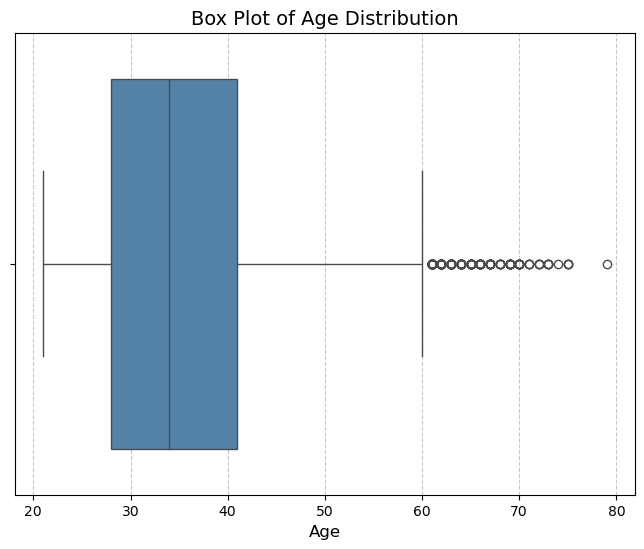

In [11]:
# plotting a box plot to check these outliers are extreme or not
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x=df_copy['AGE'], color='steelblue')

# Adding title and labels
plt.title('Box Plot of Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=10)  # Adjust x-axis numbers size

# Adding grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Observations:
- The small circles beyond the whisker represents outliers ages above 60 to 80 years old
- Keeping the 61-75 years old and limiting the extreme ages

In [12]:
# Checking for the data above 75 years old
df_copy[df_copy['AGE'] > 75]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
18245,18246,440000,1,1,1,79,0,0,0,0,...,447112,438187,447543,15715,16519,16513,15800,16531,15677,0


In [13]:
# Dropping the data above 75 years old
df_copy = df_copy[df_copy['AGE'] <= 75]

In [14]:
# Transpose for better readability
desc_df = df_copy.describe().T
print(desc_df[['min', '25%', '50%', '75%', 'max']])

                                 min      25%       50%       75%        max
ID                               1.0   7500.5   15000.0   22500.5    30000.0
LIMIT_BAL                    10000.0  50000.0  140000.0  240000.0  1000000.0
SEX                              1.0      1.0       2.0       2.0        2.0
EDUCATION                        0.0      1.0       2.0       2.0        6.0
MARRIAGE                         0.0      1.0       2.0       2.0        3.0
AGE                             21.0     28.0      34.0      41.0       75.0
PAY_0                           -2.0     -1.0       0.0       0.0        8.0
PAY_2                           -2.0     -1.0       0.0       0.0        8.0
PAY_3                           -2.0     -1.0       0.0       0.0        8.0
PAY_4                           -2.0     -1.0       0.0       0.0        8.0
PAY_5                           -2.0     -1.0       0.0       0.0        8.0
PAY_6                           -2.0     -1.0       0.0       0.0        8.0

Observations:
- Before MAX 'AGE' was 79 now after removing the outliers and limiting the MAX 'AGE' ow is 75

In [15]:
# Identifing outliers for other Numerical columns

# Using Interquartile Range (IQR) method to detect outliers in 'LIMIT_BAL'
Q1 = df_copy['LIMIT_BAL'].quantile(0.25)
Q3 = df_copy['LIMIT_BAL'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

outliers_limit_bal = df_copy[(df_copy['LIMIT_BAL'] < lower_bound) | (df_copy['LIMIT_BAL'] > upper_bound)]

print(f'Outliers in Limit Balance:\n {outliers_limit_bal}')

Lower Bound: -235000.0
Upper Bound: 525000.0
Outliers in Limit Balance:
           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
12        13     630000    2          2         2   41     -1      0     -1   
433      434     580000    2          1         1   36      0      0      0   
451      452     600000    1          1         1   53      2      2      0   
527      528     620000    2          2         1   45      2      2      0   
555      556     630000    2          2         1   47      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29571  29572     570000    1          1         2   33      0      0      0   
29740  29741     620000    1          2         2   31     -2     -2     -2   
29861  29862     650000    1          1         1   44     -2     -2     -2   
29886  29887     630000    1          2         1   46      0      0      0   
29963  29964     610000    1          1         2   31    

Observations:
- Upper bound is 525000.0 and there are 167 rows which is more than upper bound
- Instead of treating them as outliers, treating them as a premium clients and creating a new column 'HIGH_CREDIT_LIMIT'
- The number of outliers is high, removing them might affect dataset balance. Also, removing high-limit customers, may lose valuable information about premium customers who may have different default pattern

In [16]:
# Creating a new column to store premium clients limit
df_copy['HIGH_CREDIT_LIMIT'] = df_copy['LIMIT_BAL'].apply(lambda x: 1 if x > 525000.0 else 0)

In [17]:
df_copy['HIGH_CREDIT_LIMIT'].value_counts()

HIGH_CREDIT_LIMIT
0    29832
1      167
Name: count, dtype: int64

In [18]:
# Transpose for better readability
desc_df = df_copy.describe().T
print(desc_df[['min', '25%', '50%', '75%', 'max']])

                                 min      25%       50%       75%        max
ID                               1.0   7500.5   15000.0   22500.5    30000.0
LIMIT_BAL                    10000.0  50000.0  140000.0  240000.0  1000000.0
SEX                              1.0      1.0       2.0       2.0        2.0
EDUCATION                        0.0      1.0       2.0       2.0        6.0
MARRIAGE                         0.0      1.0       2.0       2.0        3.0
AGE                             21.0     28.0      34.0      41.0       75.0
PAY_0                           -2.0     -1.0       0.0       0.0        8.0
PAY_2                           -2.0     -1.0       0.0       0.0        8.0
PAY_3                           -2.0     -1.0       0.0       0.0        8.0
PAY_4                           -2.0     -1.0       0.0       0.0        8.0
PAY_5                           -2.0     -1.0       0.0       0.0        8.0
PAY_6                           -2.0     -1.0       0.0       0.0        8.0

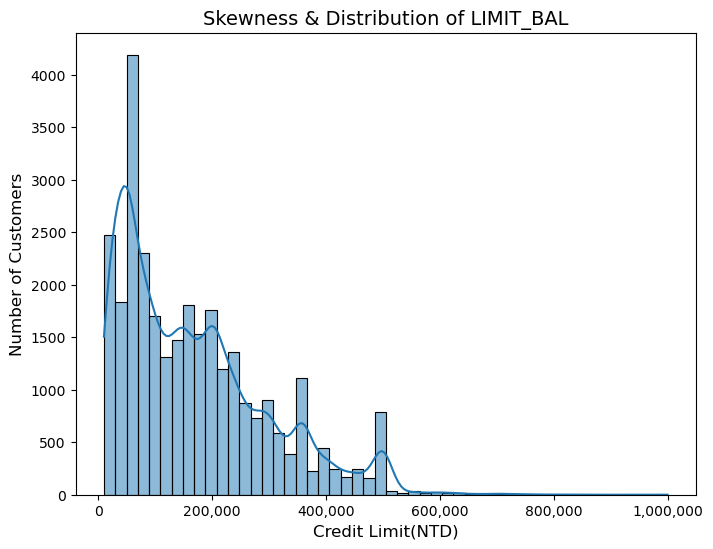

In [19]:
# plotting a box plot to check the Skewness & Distribution of LIMIT_BAL
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(x=df_copy['LIMIT_BAL'], bins = 50, kde = True)

# Adding title and labels
plt.title('Skewness & Distribution of LIMIT_BAL', fontsize=14)
plt.xlabel('Credit Limit(NTD)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)

plt.xticks(ticks = range(0, 1100000, 200000), labels = [f"{x:,}" for x in range(0, 1100000, 200000)], fontsize = 10)

plt.show()

Observations:
- Preserved original 'LIMIT_BAL' column the MAX Value is still 1M but now there is a separate flag 'HIGH_CREDIT_LIMIT' for premium clients
- Right-Skewed Distribution as most values are concentrated towards the lower limit, while fewer clients have very high credit limits
- The long tail on the right shows that a few high-limit customers exists

In [20]:
# Using Interquartile Range (IQR) method to detect outliers in 'BAL_AMT1 - BAL_AMT6'

bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

outliers_count = {}

# Looping through each column
for col in bill_columns:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
    outliers_count[col] = outliers.shape[0]

# Converting dictionary to dataframe for better visualization
outliers_df = pd.DataFrame(list(outliers_count.items()), columns = ['Column', 'Outlier Count'])
print(outliers_df)

      Column  Outlier Count
0  BILL_AMT1           2399
1  BILL_AMT2           2394
2  BILL_AMT3           2468
3  BILL_AMT4           2622
4  BILL_AMT5           2725
5  BILL_AMT6           2692


Observations:
- Since 'BILL_AMT' represents the amount owed in a given month, it should be correlted with 'LIMIT_BAL'
- Higher credit limits should generally have higher bill amounts, and lower limits should have lower bill amounts
- So, finding outliers within each limit category instead of using a global threshold

In [21]:
# Creating a dictionary to store outlier counts for each BILL_AMT column
outliers_count_group = {}

# Looping through each BILL_AMT column
for col in bill_columns:
    outliers_count_group[col] = {}

    # Grouping by HIGH_CREDIT_LIMIT and applying IQR outlier detection
    for category in df_copy['HIGH_CREDIT_LIMIT'].unique():
        subset = df_copy[df_copy['HIGH_CREDIT_LIMIT'] == category]

        Q1 = subset[col].quantile(0.25)
        Q3 = subset[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = subset[(subset[col] < lower_bound) | (subset[col] > upper_bound)]
        outliers_count_group[col][category] = outliers.shape[0]

# Converting dictionary to Dataframe for better viszualization
outliers_grouped_df = pd.DataFrame(outliers_count_group)
print(outliers_grouped_df)

   BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
0       2358       2363       2425       2614       2690       2651
1          1          1          0          1          2          1


Observations:
- Detecting the outliers in the 'BILL_AMT' columns without grouping gave the high counts (around 2400-2700 per column) → indicates that many values are being flagged as outliers
- Applying outliers within each credit limit category
    - Row 0 (2358, 2363, etc.) → One category of 'HIGH_CREDIT_LIMIT' customers has thousands of outliers
    - Row 1 (1, 1, 0, 1, 2, etc.) → The other category has almost no outliers
- So, customers with the high credit limits will naturally have bigger bill amounts, so those values shouldn't be considered as outliers

Action:
- Instead considering them as outliers or capping the values, we can segment customers into groups and then apply different IQR limits to each group
- Creating 3-4 categories on credit limit ranges:
    - Low Credit Limit
    - Medium Credit Limit
    - High Credit Limit
    - Very High Credit Limit

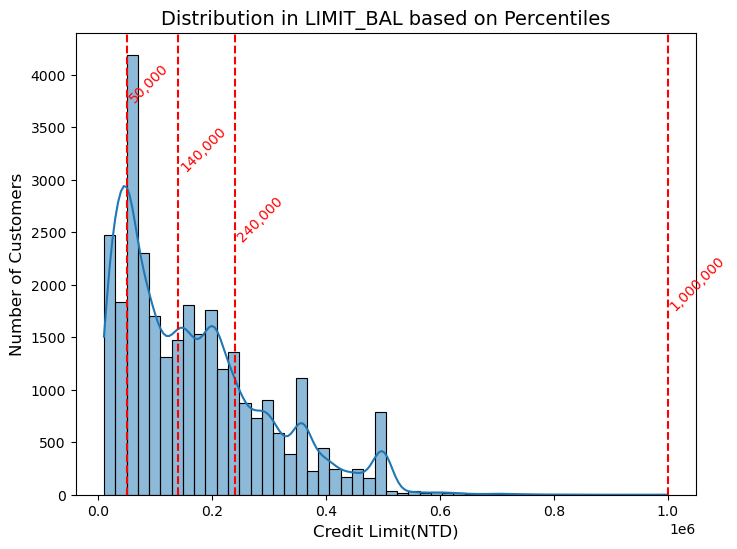

In [22]:
# Analyzing the distribution in the 'LIMIT_BAL' to set the ranges
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
sns.histplot(x = df_copy['LIMIT_BAL'], bins = 50, kde = True)

x = df_copy['LIMIT_BAL'].quantile([0.25, 0.50, 0.75, 1.0])
y_positions = [0.85, 0.70, 0.55, 0.40]

for i, percentile in enumerate(x):
    plt.axvline(x = percentile, color = 'red', linestyle = 'dashed', linewidth = 1.5)
    plt.text(percentile, plt.ylim()[1]* y_positions[i], f"{int(percentile):,}", color = 'red', fontsize = 10, rotation = 45, ha = 'left')

# Adding title and labels
plt.title('Distribution in LIMIT_BAL based on Percentiles', fontsize=14)
plt.xlabel('Credit Limit(NTD)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)

plt.show()

Observations:
- Based on the plot creating the credit limit categories
    - Low Credit Limit: `0 <= LIMIT_BAL <= 50,000`
    - Medium Credit Limit: `50,001 <= LIMIT_BAL <= 140,000`
    - High Credit Limit: `140,001 <= LIMIT_BAL <= 240,000`
    - Very High Credit Limit: `240,001 <= LIMIT_BAL <= 1,000,000`

In [23]:
# Categorize the credit limits based on 'LIMIT_BAL'

# Function to categorize LIMIT_BAL
def categorize_credit_limit(x):
    if 0 <= x <= 50000:
        return 'Low Credit Limit'
    elif 50001 <= x <= 140000:
        return 'Medium Credit Limit'
    elif 140001 <= x <= 240000:
        return 'High Credit Limit'
    else:
        return 'Very High Credit Limit'

df_copy['CREDIT_LIMIT_CATEGORY'] = df_copy['LIMIT_BAL'].apply(categorize_credit_limit)

In [24]:
# Applying IQR to detect outliers per category
import numpy as np
import pandas as pd

# Create a dictionary to store outlier counts
outlier_counts = {}

# Iterate through each 'BILL_AMT' column
for col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    outlier_counts[col] = {}  # stores the values per column

    # Grouping by 'CREDIT_LIMIT_CATEGORY'
    for category in df_copy['CREDIT_LIMIT_CATEGORY'].unique():
        subset = df_copy[df_copy['CREDIT_LIMIT_CATEGORY'] == category] [col]

        # Calculating IQR for that category
        Q1 = np.percentile(subset, 25)
        Q3 = np.percentile(subset, 75)
        IQR = Q3 - Q1

        # Defining outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Counting outliers
        outliers = subset[(subset < lower_bound) | (subset > upper_bound)].count()
        outlier_counts[col][category] = outliers

# Convert dictionary to a Dataframe for better visualization
outlier_df = pd.DataFrame(outlier_counts)
print(outlier_df)

                        BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
Low Credit Limit               48         44         42         31         41   
Medium Credit Limit            18         14         15         13         22   
Very High Credit Limit        476        558        561        556        557   
High Credit Limit              34         36         88        128        152   

                        BILL_AMT6  
Low Credit Limit               21  
Medium Credit Limit            29  
Very High Credit Limit        558  
High Credit Limit             174  


Observations:
- 'Very High Credit Limit' have 500+ outliers in each BILL_AMT column - means billing may vary significantly
- 'High Credit Limit' have moderate outliers in 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' - greater billing variability for these users compared to lower categories
- 'Medium and Low Credit Limit' have fewer outliers - means these users have more predictable spending behavior

Action:
- Since the outliers mostly exist in High Credit Limit. So, capping them to the upper bound by doing this data trends will be preserved while reducing extreme values

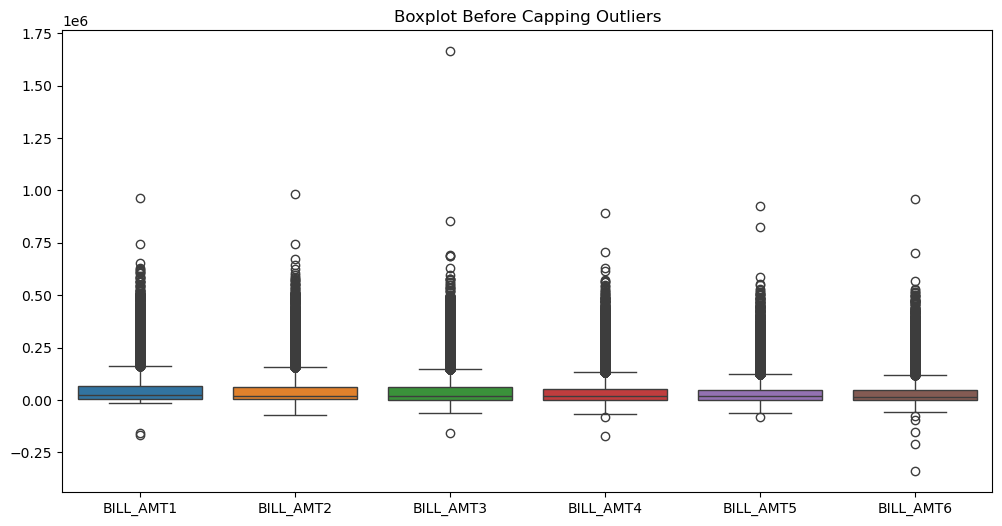

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
plt.title("Boxplot Before Capping Outliers")
plt.show()

In [26]:
# Capping outliers to upper bound
for col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    for category in df_copy['CREDIT_LIMIT_CATEGORY'].unique():
        subset = df_copy[df_copy['CREDIT_LIMIT_CATEGORY'] == category][col]

        Q1 = np.percentile(subset, 25)
        Q3 = np.percentile(subset, 75)
        IQR = Q3 - Q1

        upper_bound = int(Q3 + 1.5 * IQR)

        # Capping outliers
        df_copy.loc[df_copy['CREDIT_LIMIT_CATEGORY'] == category, col] = df_copy.loc[
            df_copy['CREDIT_LIMIT_CATEGORY'] == category, col
        ].apply(lambda x: int(min(x, upper_bound)))

In [27]:
df_copy[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,49630.322211,47424.172039,45213.840261,41571.463382,38639.307610,37217.656455
std,66431.300655,63332.258437,60895.538979,56664.864632,53209.197357,52071.648729
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3558.500000,2984.500000,2665.500000,2326.500000,1763.000000,1256.000000
50%,22381.000000,21197.000000,20088.000000,19052.000000,18104.000000,17068.000000
75%,67089.000000,64002.500000,60163.500000,54494.500000,50182.500000,49183.500000
max,298151.000000,276871.000000,267366.000000,250577.000000,231693.000000,224031.000000


Observations:
- Negative bill amounts can occur in financial dataset due to
    - Refunds or overpayments
    - Data Entry Errors
    - Disputed Transactions/Chargebacks
- As I'm working on Credit Risk and Fraud Analytics, negative values might indicate financial behaviours like refunds, overpayment. Instead of dropping them decided to replace them with '0'.

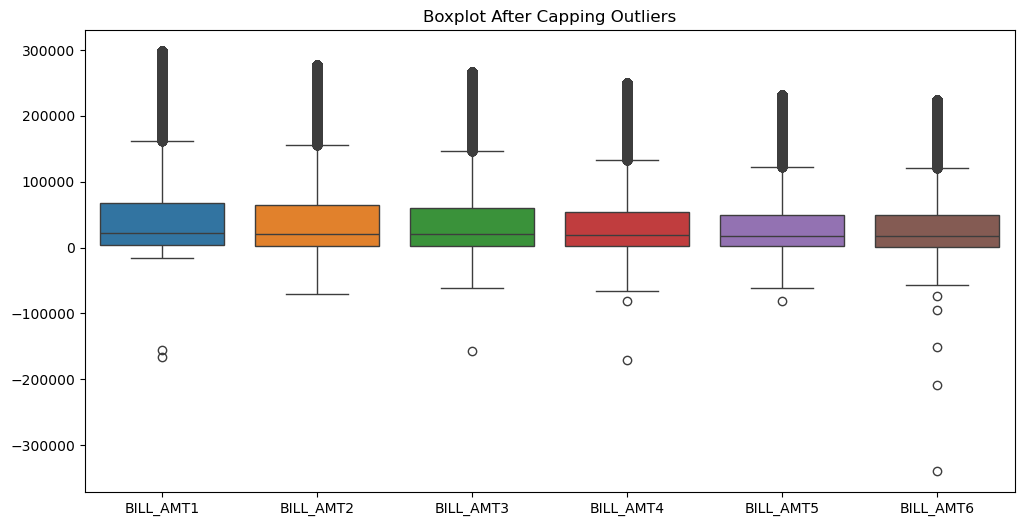

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
plt.title("Boxplot After Capping Outliers")
plt.show()

In [29]:
# Replacing the negative values in 'min' to '0'
df_copy[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']] = \
df_copy[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].clip(lower = 0)

In [30]:
df_copy[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,49653.033968,47451.615821,45245.855362,41608.167572,38674.999933,37288.167172
std,66400.993328,63307.142341,60861.624382,56622.941349,53175.425231,51950.179641
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3558.500000,2984.500000,2665.500000,2326.500000,1763.000000,1256.000000
50%,22381.000000,21197.000000,20088.000000,19052.000000,18104.000000,17068.000000
75%,67089.000000,64002.500000,60163.500000,54494.500000,50182.500000,49183.500000
max,298151.000000,276871.000000,267366.000000,250577.000000,231693.000000,224031.000000


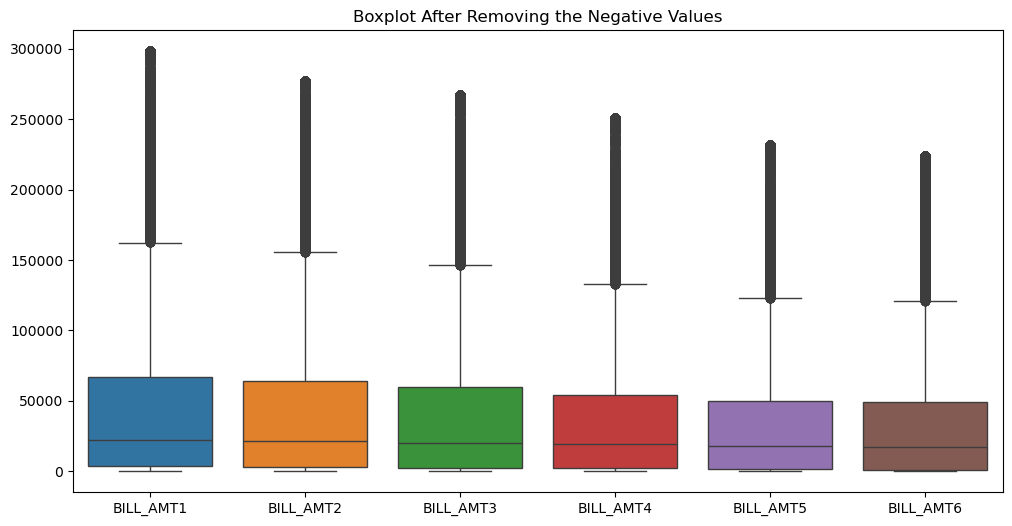

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
plt.title("Boxplot After Removing the Negative Values")
plt.show()

In [ ]:
# Using Interquartile Range (IQR) method to detect outliers in 'PAY_AMT1 - PAY_AMT6'
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

outlier_pay_counts = {}

# Looping through each column
for col in pay_columns:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
    outlier_pay_counts[col] = outliers.shape[0]

outliers_df_pay = pd.DataFrame(list(outlier_pay_counts.items()), columns = ['Column', 'Outlier Pay Count'])
print(outliers_df_pay)

     Column  Outlier Pay Count
0  PAY_AMT1               2744
1  PAY_AMT2               2713
2  PAY_AMT3               2597
3  PAY_AMT4               2993
4  PAY_AMT5               2945
5  PAY_AMT6               2957


In [38]:
# Creating a dictionary to store outlier for each 'PAY_AMT' column
outliers_pay_Group = {}

# Looping through each 'PAY_AMT' column
for col in pay_columns:
    outliers_pay_Group[col] = {}

    for category in df_copy['HIGH_CREDIT_LIMIT'].unique():
        subset = df_copy[df_copy['HIGH_CREDIT_LIMIT'] == category]

        Q1 = subset[col].quantile(0.25)
        Q3 = subset[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_Pay = subset[(subset[col] < lower_bound) | (subset[col] > upper_bound)]
        outliers_pay_Group[col][category] = outliers_Pay.shape[0]

outlier_grouped_pay_df = pd.DataFrame(outliers_pay_Group)
print(outlier_grouped_pay_df)

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
0      2686      2646      2536      2936      2886      2881
1        12        12        14        16        21        21


In [41]:
# Creating 'LIMIT_BAL_GROUP'

# Defining bins based on percentiles
bins = np.percentile(df_copy['LIMIT_BAL'], [0, 25, 50, 75, 100])
labels = ['Low Limit', 'Medium Limit', 'High Limit', 'Very High Limit']

# Creating a categorical column
df_copy['LIMIT_BAL_GROUP'] = pd.cut(df_copy['LIMIT_BAL'], bins = bins, labels = labels, include_lowest = True)

# Checking distribution
df_copy['LIMIT_BAL_GROUP'].value_counts()

LIMIT_BAL_GROUP
Low Limit          7676
High Limit         7643
Medium Limit       7614
Very High Limit    7066
Name: count, dtype: int64

In [44]:
# Applying IQR for PAY_AMT based on LIMIT_BAL_GROUP
for category in df_copy['LIMIT_BAL_GROUP'].unique():
    print(f'\nLIMIT_BAL_GROUP: {category}')

    for col in pay_columns:
        Q1 = df_copy[df_copy['LIMIT_BAL_GROUP'] == category] [col].quantile(0.25)
        Q3 = df_copy[df_copy['LIMIT_BAL_GROUP'] == category] [col].quantile(0.75)
        IQR = Q3 - Q1

        print(f'    {col} - IQR: {IQR}')
    
    print("-" * 50)


LIMIT_BAL_GROUP: Low Limit
    PAY_AMT1 - IQR: 1140.25
    PAY_AMT2 - IQR: 1265.0
    PAY_AMT3 - IQR: 1549.25
    PAY_AMT4 - IQR: 1383.0
    PAY_AMT5 - IQR: 1500.0
    PAY_AMT6 - IQR: 1500.0
--------------------------------------------------

LIMIT_BAL_GROUP: Medium Limit
    PAY_AMT1 - IQR: 2900.75
    PAY_AMT2 - IQR: 2951.0
    PAY_AMT3 - IQR: 2700.0
    PAY_AMT4 - IQR: 2517.75
    PAY_AMT5 - IQR: 2597.0
    PAY_AMT6 - IQR: 2612.75
--------------------------------------------------

LIMIT_BAL_GROUP: Very High Limit
    PAY_AMT1 - IQR: 9040.75
    PAY_AMT2 - IQR: 9064.0
    PAY_AMT3 - IQR: 8996.5
    PAY_AMT4 - IQR: 8110.0
    PAY_AMT5 - IQR: 7755.5
    PAY_AMT6 - IQR: 8208.25
--------------------------------------------------

LIMIT_BAL_GROUP: High Limit
    PAY_AMT1 - IQR: 6078.0
    PAY_AMT2 - IQR: 5753.5
    PAY_AMT3 - IQR: 5313.5
    PAY_AMT4 - IQR: 4873.0
    PAY_AMT5 - IQR: 4977.0
    PAY_AMT6 - IQR: 4996.0
--------------------------------------------------


In [46]:
# Applying IQR for PAY_AMT based on the percentiles
for col in pay_columns:
    bins_pay = np.percentile(df_copy[col], [0, 25, 50, 75, 100])
    labels_pay = ['Low Payment', 'Medium Payment', 'High Payment', 'Very High Payment']

    # Assign categories
    df_copy[f'{col}_GROUP'] = pd.cut(df_copy[col], bins = bins_pay, labels = labels_pay, include_lowest = True)

    print(f'Distribution for {col}:')
    print(df_copy[f'{col}_GROUP'].value_counts())
    print("-" * 50)

Distribution for PAY_AMT1:
PAY_AMT1_GROUP
Low Payment          7839
Very High Payment    7496
High Payment         7490
Medium Payment       7174
Name: count, dtype: int64
--------------------------------------------------
Distribution for PAY_AMT2:
PAY_AMT2_GROUP
High Payment         7751
Medium Payment       7503
Low Payment          7502
Very High Payment    7243
Name: count, dtype: int64
--------------------------------------------------
Distribution for PAY_AMT3:
PAY_AMT3_GROUP
Low Payment          7526
Very High Payment    7500
High Payment         7487
Medium Payment       7486
Name: count, dtype: int64
--------------------------------------------------
Distribution for PAY_AMT4:
PAY_AMT4_GROUP
Medium Payment       7655
Low Payment          7503
Very High Payment    7499
High Payment         7342
Name: count, dtype: int64
--------------------------------------------------
Distribution for PAY_AMT5:
PAY_AMT5_GROUP
Medium Payment       7546
Low Payment          7500
Very High Paym

In [49]:
# Identifying the outliers count in each category
outliers_count = {}

for category in df_copy['LIMIT_BAL_GROUP'].unique():
    print(f'\nLIMIT_BAL_GROUP: {category}')

    for col in pay_columns:
        Q1 = df_copy[df_copy['LIMIT_BAL_GROUP'] == category] [col].quantile(0.25)
        Q3 = df_copy[df_copy['LIMIT_BAL_GROUP'] == category] [col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df_copy[(df_copy['LIMIT_BAL_GROUP'] == category) & ((df_copy[col] < lower_bound) | (df_copy[col] > upper_bound))].shape[0]

        outliers_count[f'{category} - {col}'] = outlier_count

        print(f'    {col} - Outliers: {outlier_count}')

    print("-" * 50)

print("\nTotal Outliers Across All Groups:")
print(sum(outliers_count.values()))


LIMIT_BAL_GROUP: Low Limit
    PAY_AMT1 - Outliers: 753
    PAY_AMT2 - Outliers: 683
    PAY_AMT3 - Outliers: 533
    PAY_AMT4 - Outliers: 600
    PAY_AMT5 - Outliers: 557
    PAY_AMT6 - Outliers: 530
--------------------------------------------------

LIMIT_BAL_GROUP: Medium Limit
    PAY_AMT1 - Outliers: 507
    PAY_AMT2 - Outliers: 496
    PAY_AMT3 - Outliers: 475
    PAY_AMT4 - Outliers: 526
    PAY_AMT5 - Outliers: 550
    PAY_AMT6 - Outliers: 535
--------------------------------------------------

LIMIT_BAL_GROUP: Very High Limit
    PAY_AMT1 - Outliers: 581
    PAY_AMT2 - Outliers: 622
    PAY_AMT3 - Outliers: 570
    PAY_AMT4 - Outliers: 585
    PAY_AMT5 - Outliers: 667
    PAY_AMT6 - Outliers: 659
--------------------------------------------------

LIMIT_BAL_GROUP: High Limit
    PAY_AMT1 - Outliers: 455
    PAY_AMT2 - Outliers: 513
    PAY_AMT3 - Outliers: 525
    PAY_AMT4 - Outliers: 540
    PAY_AMT5 - Outliers: 529
    PAY_AMT6 - Outliers: 530
-----------------------------

Observations:
- Total outliers count is 13521 across all groups
- Instead of removing all these outliers, retaining all data by applying Winsorization by removing extreme values

In [51]:
# Capping (Winsorization) for PAY_AMT columns
pay_amt_dtype = df_copy[pay_columns].dtypes

for category in df_copy['LIMIT_BAL_GROUP'].unique():
    for col in pay_columns:
        Q1 = df_copy[df_copy['LIMIT_BAL_GROUP'] == category] [col].quantile(0.25)
        Q3 = df_copy[df_copy['LIMIT_BAL_GROUP'] == category] [col].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_copy.loc[(df_copy['LIMIT_BAL_GROUP'] == category) & (df_copy[col] < lower_bound), col] = lower_bound
        df_copy.loc[(df_copy['LIMIT_BAL_GROUP'] == category) & (df_copy[col] > upper_bound), col] = upper_bound

print(f'Winsorization applied successfully! Extreme values capped.')

Winsorization applied successfully! Extreme values capped.


In [53]:
# Checking if outliers are removed after capping

outliers_after_capping = {}

for category in df_copy['LIMIT_BAL_GROUP'].unique():
    for col in pay_columns:
        Q1 = df_copy[df_copy['LIMIT_BAL_GROUP'] == category] [col].quantile(0.25)
        Q3 = df_copy[df_copy['LIMIT_BAL_GROUP'] == category] [col].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df_copy[
            (df_copy['LIMIT_BAL_GROUP'] == category) &
            ((df_copy[col] < lower_bound) | (df_copy[col] > upper_bound))
        ].shape[0]

        outliers_after_capping[f'{category} - {col}'] = outlier_count

print("\n Outliers after capping:")
print(outliers_after_capping)


 Outliers after capping:
{'Low Limit - PAY_AMT1': 0, 'Low Limit - PAY_AMT2': 0, 'Low Limit - PAY_AMT3': 0, 'Low Limit - PAY_AMT4': 0, 'Low Limit - PAY_AMT5': 0, 'Low Limit - PAY_AMT6': 0, 'Medium Limit - PAY_AMT1': 0, 'Medium Limit - PAY_AMT2': 0, 'Medium Limit - PAY_AMT3': 0, 'Medium Limit - PAY_AMT4': 0, 'Medium Limit - PAY_AMT5': 0, 'Medium Limit - PAY_AMT6': 0, 'Very High Limit - PAY_AMT1': 0, 'Very High Limit - PAY_AMT2': 0, 'Very High Limit - PAY_AMT3': 0, 'Very High Limit - PAY_AMT4': 0, 'Very High Limit - PAY_AMT5': 0, 'Very High Limit - PAY_AMT6': 0, 'High Limit - PAY_AMT1': 0, 'High Limit - PAY_AMT2': 0, 'High Limit - PAY_AMT3': 0, 'High Limit - PAY_AMT4': 0, 'High Limit - PAY_AMT5': 0, 'High Limit - PAY_AMT6': 0}


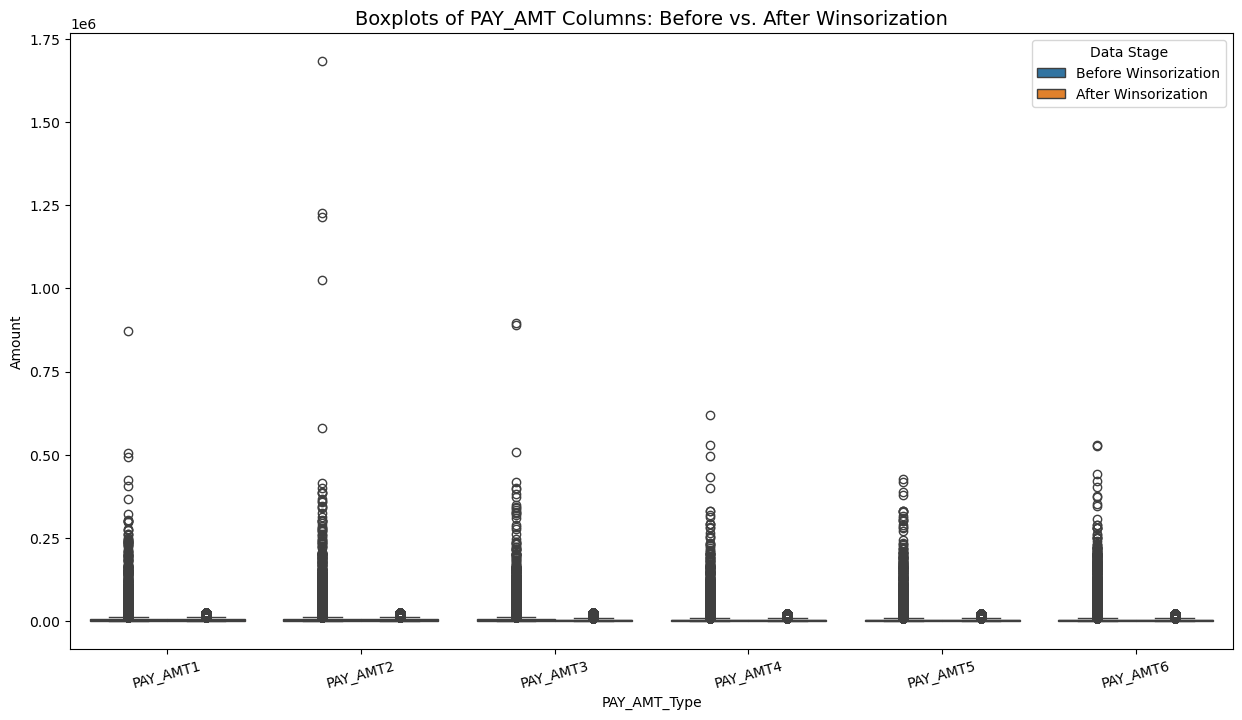

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make a copy of original PAY_AMT columns before Winsorization
pay_amt_original = df[pay_columns].copy()

# Convert data into long format for easier plotting
df_before = pay_amt_original.melt(var_name="PAY_AMT_Type", value_name="Amount")
df_before["Stage"] = "Before Winsorization"

df_after = df_copy[pay_columns].melt(var_name="PAY_AMT_Type", value_name="Amount")
df_after["Stage"] = "After Winsorization"

# Combine both before & after datasets
df_compare = pd.concat([df_before, df_after])

# Set up the figure
plt.figure(figsize=(15, 8))
sns.boxplot(x="PAY_AMT_Type", y="Amount", hue="Stage", data=df_compare)

plt.xticks(rotation=15)
plt.title("Boxplots of PAY_AMT Columns: Before vs. After Winsorization", fontsize=14)
plt.legend(title="Data Stage")
plt.show()

In [57]:
print("Before Winsorization:")
print(df[pay_columns].describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99]))

Before Winsorization:
            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
95%     18428.200000  1.900435e+04   17589.40000   16014.950000   
99%     66522.180000  7.665102e+04   70000.00000   67054.440000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      150

In [58]:
print("\nAfter Winsorization:")
print(df_copy[pay_columns].describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99]))


After Winsorization:
           PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5  \
count  29999.000000  29999.000000  29999.000000  29999.000000  29999.000000   
mean    3859.280722   3772.306852   3360.116550   3002.108195   2998.365054   
std     4773.183234   4794.732708   4560.916823   4149.837434   4080.806752   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     1000.000000    833.000000    390.000000    296.000000    252.000000   
50%     2100.000000   2009.000000   1800.000000   1500.000000   1500.000000   
75%     5000.000000   4925.500000   4174.125000   3826.000000   3900.000000   
95%    15069.200000  14802.750000  13584.250000  12309.500000  12465.500000   
99%    23604.125000  23650.000000  23075.750000  20665.000000  19815.250000   
max    23604.125000  23650.000000  23075.750000  20665.000000  19815.250000   

           PAY_AMT6  
count  29999.000000  
mean    3022.179856  
std     4277.368256  
min        0.000000 

In [61]:
# Define the file path inside the 'data' folder
cleaned_file_path = "..\data\cleaned_dataset.csv"

# Save the cleaned dataset
df_copy.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")

Cleaned dataset saved at: ..\data\cleaned_dataset.csv
